Special thanks to Jeff Heaton.
[Github Link](https://github.com/jeffheaton/app_deep_learning/blob/main/t81_558_class_03_3_feature_encode.ipynb)

In [602]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8-ticks')
%config InlineBackend.figure_formats =['png']

# Data
this data is from the instructor himself

In [603]:
df = pd.read_csv('https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv', na_values=['NA','?'])

In [604]:
df

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,vv,c,51017.0,38.233333,1,5.454545,34,14.013489,41,0.881890,0.744094,0.104838,b
1996,1997,kl,d,26576.0,33.358333,2,3.632069,20,8.380497,38,0.944882,0.877953,0.063851,a
1997,1998,kl,d,28595.0,39.425000,3,7.168218,99,4.626950,36,0.759843,0.744094,0.098703,f
1998,1999,qp,c,67949.0,5.733333,0,8.936292,26,3.281439,46,0.909449,0.598425,0.117803,c


In [605]:
df.keys().values, len(df.keys())

(array(['id', 'job', 'area', 'income', 'aspect', 'subscriptions',
        'dist_healthy', 'save_rate', 'dist_unhealthy', 'age', 'pop_dense',
        'retail_dense', 'crime', 'product'], dtype=object),
 14)

# Fill Nulls

In [606]:
df.columns[df.isna().any()][0]

'income'

In [607]:
df[df.isna().any(axis=1)]

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
35,36,kd,c,NaN,15.158333,1,5.454545,25,5.240972,50,0.874016,0.417323,0.238394,b
69,70,al,c,NaN,9.091667,1,9.289907,16,4.717718,47,0.858268,0.503937,0.263349,c
101,102,nn,c,NaN,37.583333,0,16.715820,27,11.770971,44,0.925197,0.692913,0.086156,c
134,135,pz,a,NaN,4.108333,1,7.875447,64,10.313334,44,0.826772,0.586614,0.303499,c
155,156,pz,a,NaN,29.891667,1,12.989263,86,33.368554,43,0.992126,0.775591,0.443469,b
182,183,pz,a,NaN,37.258333,2,8.718683,87,30.180975,37,0.854331,0.818898,0.095497,b
290,291,mm,c,NaN,8.875000,0,2.816034,0,9.587186,47,0.925197,0.598425,0.342256,c
296,297,pe,c,NaN,6.275000,0,2.816034,0,11.867079,47,0.913386,0.598425,0.424509,c
396,397,pe,a,NaN,40.075000,0,2.816034,4,20.644935,45,0.905512,0.657480,0.304057,c
430,431,vv,c,NaN,28.700000,1,24.277738,290,8.588731,45,0.988189,0.720472,0.250244,b


In [608]:
nanCols = df.columns[df.isna().any()][0]
df[nanCols] = df[nanCols].fillna(df[nanCols].median())

In [609]:
df[df['job'] == 'vv']

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
14,15,vv,c,59554.0,36.716667,1,10.024338,-11,15.519179,44,0.929134,0.712598,0.194898,b
43,44,vv,c,68516.0,34.550000,1,24.087330,166,9.111985,42,0.948819,0.771654,0.386728,c
56,57,vv,c,65186.0,31.625000,1,6.080172,24,16.704510,42,0.980315,0.803150,0.102049,c
88,89,vv,c,58562.0,24.691667,1,10.024338,39,9.037235,47,0.976378,0.633858,0.214276,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1888,vv,c,55232.0,41.808333,1,6.896206,4,3.927498,44,0.858268,0.633858,0.055068,b
1889,1890,vv,c,58633.0,29.675000,0,19.299928,81,5.075453,45,0.968504,0.688976,0.396766,b
1954,1955,vv,c,63202.0,28.808333,1,4.937724,5,15.017283,44,0.996063,0.751969,0.055765,b
1971,1972,vv,c,68126.0,6.491667,1,21.612026,41,17.585500,46,0.846457,0.539370,0.468423,c


# Create Dummies

In [610]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
col = ['age','job','area','product']

for n in col:
    df[n] = df[n].apply(str)
    df[f'encoded_{n}'] = le.fit_transform(df[n].values) # Encode and assign to one column, get dummies would split into 4 cols in example

df = df.drop(columns=col)

In [611]:
df.dtypes

id                   int64
income             float64
aspect             float64
subscriptions        int64
dist_healthy       float64
save_rate            int64
dist_unhealthy     float64
pop_dense          float64
retail_dense       float64
crime              float64
encoded_age          int32
encoded_job          int32
encoded_area         int32
encoded_product      int32
dtype: object

In [612]:
from scipy import stats
col = df.keys().drop(['encoded_age','encoded_job','encoded_area','encoded_product','id'])
for n in col:
    df[n] = stats.zscore(df[n])

In [613]:
df.sample(n=15)

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,pop_dense,retail_dense,crime,encoded_age,encoded_job,encoded_area,encoded_product
1351,1352,-0.127726,-0.198784,0.839031,-0.124360,0.781433,-0.941181,0.079279,-1.290697,-0.703240,22,13,2,1
1213,1214,0.306277,-0.611133,-1.255928,1.608238,-0.026641,2.138989,0.542148,0.075597,2.593714,18,7,0,2
656,657,1.389442,0.491453,1.886511,0.782287,2.982142,0.533527,1.365026,1.261438,0.804179,12,26,0,2
719,720,-2.054293,1.262368,0.839031,-0.466133,0.317220,-0.849459,0.233569,1.648125,-1.379558,10,4,3,0
190,191,0.747353,-0.620098,-0.208449,-0.637019,-0.404888,-0.672520,-0.486449,-1.161802,0.277307,21,20,0,1
1593,1594,0.482687,-0.548385,-0.208449,-0.062651,-0.146992,0.655823,0.027849,-0.749335,-0.864885,20,26,0,2
1513,1514,-2.082482,-1.077268,-1.255928,-0.561070,-0.404888,-0.624382,0.233569,0.024039,-1.265948,18,4,3,0
221,222,0.172201,1.585076,-0.208449,-0.504108,-0.353308,0.046945,-0.126440,0.720076,-0.782537,14,26,0,1
424,425,0.288646,1.441650,-0.208449,0.150957,0.248448,-1.246921,0.130709,1.055205,-1.191226,13,21,1,2
979,980,0.433281,-0.718703,-0.208449,1.608238,1.434768,-1.304817,-0.435020,-0.955569,-0.177130,20,13,2,1


In [617]:
X_cols = df.columns.drop(['id'])
X_cols.shape[0]

13

In [619]:
X = df[X_cols].values
y = df['encoded_product']

In [620]:
def createModel():
    return nn.Sequential(
        nn.Linear(13, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, 7),
    )

In [621]:
import sklearn.metrics as metrics

def trainModel(model):
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for epoch_i in range(learning_epochs):
        # Switch to training mode
        model.train()

        # Stored every batch
        batch_loss = []
        batch_acc = []

        for dat, y in train_dl:
            # Forward
            yHat = model(dat)
            loss = loss_func(yHat, y)
            batch_loss.append(loss.item())

            # Optimizer
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Predictions
            TP = torch.argmax(yHat, axis=1)
            batch_acc.append(metrics.accuracy_score(y, TP)*100)

        # End of batch training
        train_loss.append(np.mean(batch_loss))
        train_acc.append(np.mean(batch_acc))

        ## Testing
        model.eval()
        nxtDat, nxtY = next(iter(test_dl))
        with torch.no_grad():  # Deactivates AutoGrad()
            yHat = model(nxtDat)

        # Save loss
        loss = loss_func(yHat, nxtY)
        test_loss.append(loss)

        # Compute accuracy
        TP = torch.argmax(yHat, axis=1)
        test_acc.append(metrics.accuracy_score(nxtY, TP)*100)

        print(f'Epoch {epoch_i}, Training Accuracy {train_loss[-1]}, Testing Accuracy {test_loss[-1]}')

    # End of Training

    return train_loss, test_loss, train_acc, test_acc

# Pytorch

In [622]:
X_t = torch.tensor(X, dtype=torch.float)
y_t = torch.tensor(y, dtype=torch.int64)

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_dl = DataLoader(train_ds, batch_size=train_ds.tensors[0].shape[0], drop_last=True, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])

In [624]:
print('========= Dataset =========')
print(f'Training DataSet = X({train_ds.tensors[0].shape}) , Y({train_ds.tensors[1].shape})')
print(f'Testing DataSet = X({test_ds.tensors[0].shape}) , Y({test_ds.tensors[1].shape})')
print('========= DataLoader =========')
print(f'Training DataLoader = Elements per batch {train_dl.batch_size}, Batches = {len(train_dl)}')
print(f'Testing DataLoader = Elements per batch {test_dl.batch_size}, Batches = {len(test_dl)}')

========= Dataset =========
Training DataSet = X(torch.Size([1600, 13])) , Y(torch.Size([1600]))
Testing DataSet = X(torch.Size([400, 13])) , Y(torch.Size([400]))
========= DataLoader =========
Training DataLoader = Elements per batch 1600, Batches = 1
Testing DataLoader = Elements per batch 400, Batches = 1


# Pytorch Modeling

In [625]:
learning_rate = 0.05
learning_epochs = 1000

In [626]:
model = createModel()
train_loss, test_loss, train_acc, test_acc = trainModel(model)

Epoch 0, Training Accuracy 1.838446021080017, Testing Accuracy 1.8190137147903442
Epoch 1, Training Accuracy 1.6947500705718994, Testing Accuracy 1.797208309173584
Epoch 2, Training Accuracy 1.5721638202667236, Testing Accuracy 1.7773621082305908
Epoch 3, Training Accuracy 1.4700634479522705, Testing Accuracy 1.758912205696106
Epoch 4, Training Accuracy 1.3819029331207275, Testing Accuracy 1.7410942316055298
Epoch 5, Training Accuracy 1.3044674396514893, Testing Accuracy 1.7226983308792114
Epoch 6, Training Accuracy 1.2355502843856812, Testing Accuracy 1.702494502067566
Epoch 7, Training Accuracy 1.1735618114471436, Testing Accuracy 1.680781602859497
Epoch 8, Training Accuracy 1.116722583770752, Testing Accuracy 1.657767653465271
Epoch 9, Training Accuracy 1.0643631219863892, Testing Accuracy 1.6337453126907349
Epoch 10, Training Accuracy 1.0164541006088257, Testing Accuracy 1.6086360216140747
Epoch 11, Training Accuracy 0.9729176163673401, Testing Accuracy 1.581680178642273
Epoch 12, 

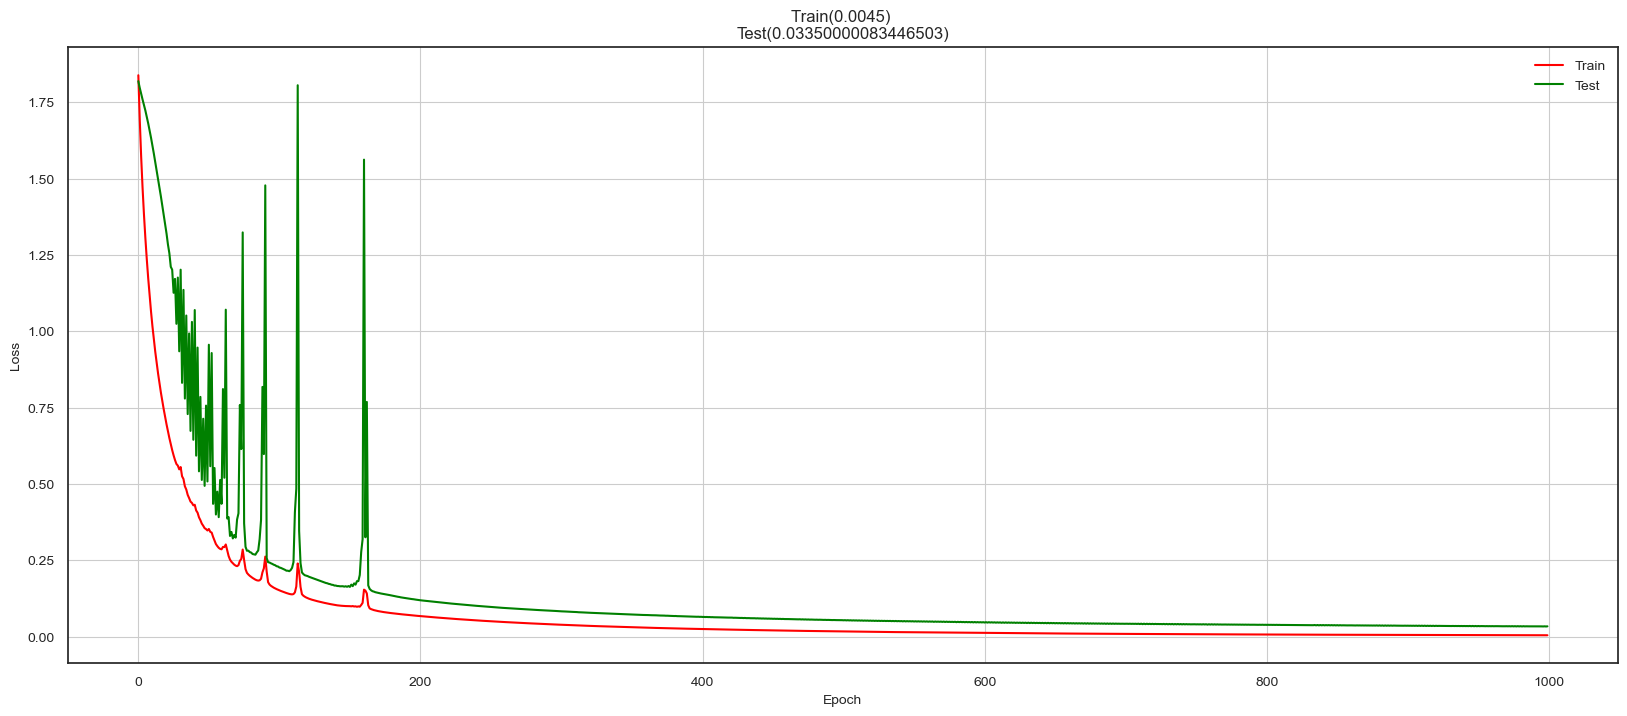

In [627]:
plt.figure(figsize=(20,8))
plt.plot(train_loss,'r',label='Train')
plt.plot(test_loss,'g',label='Test')
plt.title(f'Train({np.round(np.mean(train_loss[-20:]),4)}) \n'
          f'Test({np.round(np.mean(test_loss[-20:]),4)})')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

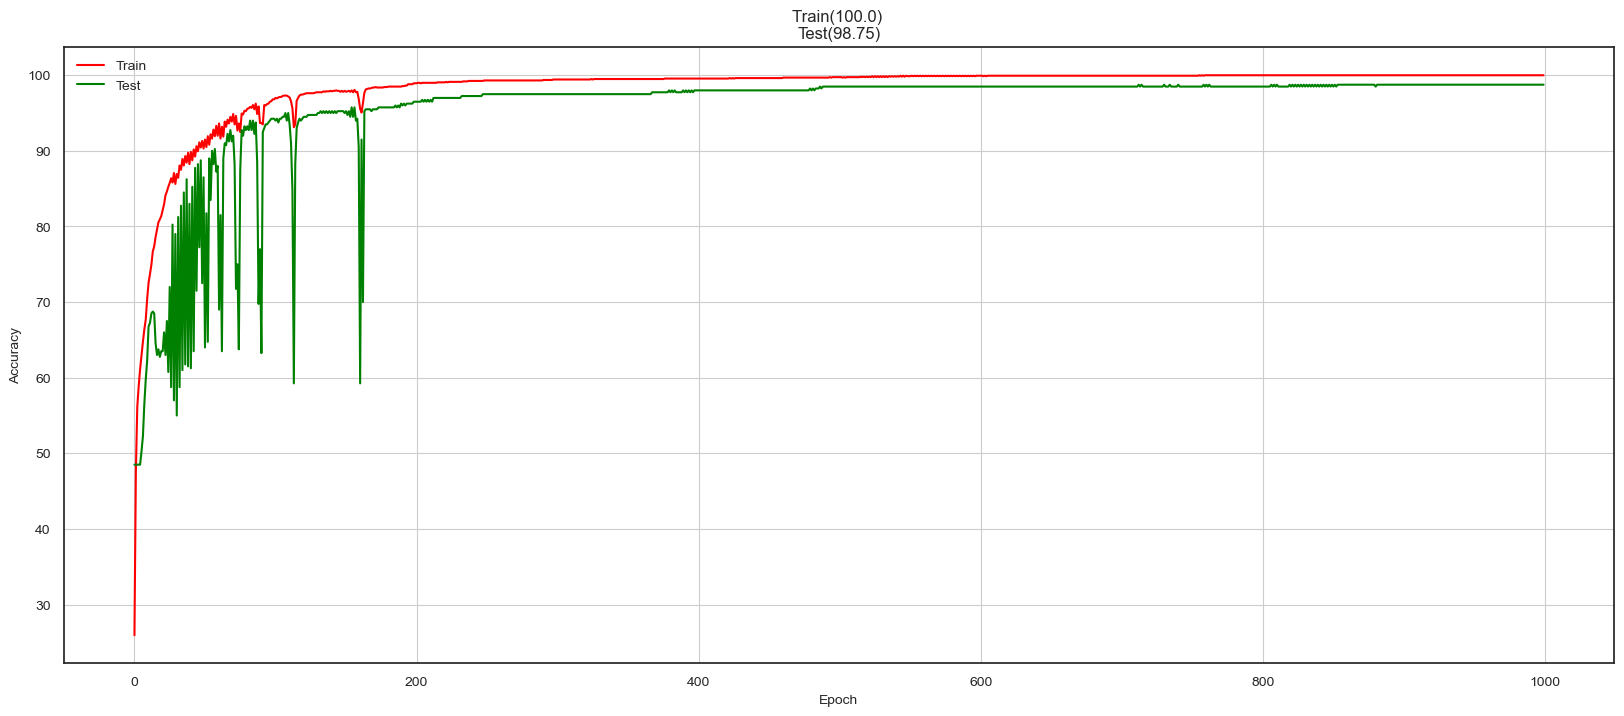

In [628]:
plt.figure(figsize=(20,8))
plt.plot(train_acc,'r',label='Train')
plt.plot(test_acc,'g',label='Test')
plt.title(f'Train({np.round(np.mean(train_acc[-20:]),4)}) \n'
          f'Test({np.round(np.mean(test_acc[-20:]),4)})')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()